# Определение рыночной стоимости объектов недвижимости.

***Задача — установить параметры, влияющие на стоимость недвижимости.***

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


### Шаг 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

try:
    df = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Яндекс.Недвижимость/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head(15) # Выводим на экран первые 15 строк таблицы:

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info() # Получаем общую информацию о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***Описание данных***

-	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-	balcony — число балконов
-	ceiling_height — высота потолков (м)
-	cityCenters_nearest — расстояние до центра города (м)
-	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-	first_day_exposition — дата публикации
-	floor — этаж
-	floors_total — всего этажей в доме
-	is_apartment — апартаменты (булев тип)
-	kitchen_area — площадь кухни в квадратных метрах (м²)
-	last_price — цена на момент снятия с публикации
-	living_area — жилая площадь в квадратных метрах (м²)
-	locality_name — название населённого пункта
-	open_plan — свободная планировка (булев тип)
-	parks_around3000 — число парков в радиусе 3 км
-	parks_nearest — расстояние до ближайшего парка (м)
-	ponds_around3000 — число водоёмов в радиусе 3 км
-	ponds_nearest — расстояние до ближайшего водоёма (м)
-	rooms — число комнат
-	studio — квартира-студия (булев тип)
-	total_area — площадь квартиры в квадратных метрах (м²)
-	total_images — число фотографий квартиры в объявлении

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
df.isna().mean() # посмотрим долю пропущенных значений среди всех данных

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
df.duplicated().sum() # проверим на дубликаты

0

Первичный просмотр данных показал, что таблица состоит из 22 столбцов, из которых 8 не меют пропусков (total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan). 

Есть столбцы полученные автоматически на основе картографических данных (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) - в них есть пропущенные значения, которые заполнить у нас не получится из-за отсутствия адреса объекта.

Столбцы 
- ceiling_height (высота потолков), 
- floors_total (всего этажей в доме), 
- living_area (жилая площадь), 
- is_apartment ( апартаменты), 
- kitchen_area (площадь кухни), 
- balcony (число балконов), 
- locality_name (название населённого пункта), 
- days_exposition (сколько дней было размещено объявление)
имеют пропущенные значения.    

### Шаг 2.1 Заполнение пропусков

Столбцы: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan пропусков не имеют.

Столбец ceiling_height - высота потолков (м)- содержит 38% пропусков. 
Столбец floors_total — всего этажей в доме - имеет меньше 1% пропусков. Какую-то логическую замену по ним сделать не вижу возможности. Стоит удалить эти пропуски. 
Для квартир типа studio и open_plan заменим пропуки в kitchen_area на 5. Юридически минимальное кухонное пространство должно составлять 5 квадратных метров. БТИ рассчитывают площади или исходя из кухния - 5 кв.м, или жилая комната 9 кв. м

In [6]:
# вероятно, что информацию в is_apartment вносили владельцы квартир и если квартира не является аппартаментами, то большинство игнорировало eё заполнение
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [7]:
df['balcony'] = df['balcony'].fillna(0) # вероятно пропуск в солбце balcony это отсутствие балкона. 
#df.isna().mean()

In [8]:
df = df.drop(columns=['parks_nearest', 'ponds_nearest', 'total_images', 'parks_around3000', 'ponds_around3000', 'airports_nearest']) # удалим столбцы, которые не будем использовать 

In [9]:
# для квартир типа studio и open_plan заменим пропуки в kitchen_area на 5
df['kitchen_area'] = df.apply(
    lambda x:
    df['kitchen_area'] == 5
    if pd.isnull(x['kitchen_area']) and (x['studio'] == True or x['open_plan'] == True) else x['kitchen_area'], 
    axis=1) 
df.isnull().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2062
balcony                    0
locality_name             49
cityCenters_nearest     5519
days_exposition         3181
dtype: int64

In [10]:
# заменим пропуски в столбце living_area на разницу общей площади и площади кухни, для строк с заполненными значениями
# эта замена позволит не присвоить какой-то квартире занчение больше общей или жилой площади, если брать среднее
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform("median"))
df.isnull().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2062
balcony                    0
locality_name             49
cityCenters_nearest     5519
days_exposition         3181
dtype: int64

In [11]:
# Заменим оставшиеся пропуски на 0, т.к. какую-то логическую замену не вижу.Возможно это какие то особенные квартиры, 
df['kitchen_area'].fillna(0, inplace=True) # а возможно это аппартаменты, про которые тоже забыли упомянуть. 
df.isnull().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
cityCenters_nearest     5519
days_exposition         3181
dtype: int64

In [12]:
# Не по всем объектам есть данные о сроках продажи. Возможно, что к моменту сбора данных они ещё не были проданы.
df[df['days_exposition'].isnull()].pivot_table(columns = 'first_day_exposition', values = 'total_area', aggfunc = 'count')

first_day_exposition,2014-11-27T00:00:00,2014-12-08T00:00:00,2014-12-09T00:00:00,2014-12-10T00:00:00,2014-12-11T00:00:00,2014-12-12T00:00:00,2014-12-27T00:00:00,2015-01-03T00:00:00,2015-01-15T00:00:00,2015-01-20T00:00:00,...,2019-04-24T00:00:00,2019-04-25T00:00:00,2019-04-26T00:00:00,2019-04-27T00:00:00,2019-04-28T00:00:00,2019-04-29T00:00:00,2019-04-30T00:00:00,2019-05-01T00:00:00,2019-05-02T00:00:00,2019-05-03T00:00:00
total_area,3,1,7,3,2,1,1,1,1,1,...,32,26,35,14,18,36,25,29,11,20


***Вывод по заполнению пропусков***

- floors_total — всего этажей в доме - имеет меньше 1% пропусков, удалим их
- is_apartment - заменили пропуски в соответствии с предположением, что это не апартаменты
- balcony - отсутствие значения заменили на 0
- parks_nearest, ponds_nearest, total_images - удалим столбцы
- kitchen_area - для квартир типа студия и открытая планировка пропуски заменим на 5, остальное заменим на 0
- living_area - пропуски заменим разницей общей площади и площади кухни, для строк с заполненными значениями, остальное заменим на 0
- days_exposition - не заполняли пропуски

### Шаг 2.2 Изменение типов данных

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # object заменим на datetime, т.к. в дальнейшем нам нужнабудет именно дата
df['floors_total'] = df['floors_total'].fillna(0).convert_dtypes() #  количество этажей и балконов принято измерять целыми числами
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  float64       
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        14504 non-null  float64       
 5   floors_total          23699 non-null  Int64         
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   is_apartment          23699 non-null  bool          
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  object        
 12  balcony               23699 non-null  int32         
 13  locality_name   

### Шаг 3 Добавление дополнительны столбцов

In [14]:
df['m_price'] = (df['last_price'] / df['total_area']).round(2) # рассчитаем цену квадратного метра для каждого объекта
#df.head()

In [15]:
# добавим столбец с типом этажа(первый, последний, другой)
def floor_type (row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == floors_total:
        return 'Последний'
    if floor == 1:
        return 'Первый'
    return 'Другой'


df['floor_type'] = df.apply(floor_type, axis=1)
#df.head()

In [16]:
df['ratio_living_total_area'] = df['living_area'] / df['total_area'].round(2) # добавим соотношение жилой и общей площади
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area'].round(2) # добавим площади кухни и общей площади
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_price                23699 non-null  float64       
 1   total_area                23699 non-null  float64       
 2   first_day_exposition      23699 non-null  datetime64[ns]
 3   rooms                     23699 non-null  int64         
 4   ceiling_height            14504 non-null  float64       
 5   floors_total              23699 non-null  Int64         
 6   living_area               23699 non-null  float64       
 7   floor                     23699 non-null  int64         
 8   is_apartment              23699 non-null  bool          
 9   studio                    23699 non-null  bool          
 10  open_plan                 23699 non-null  bool          
 11  kitchen_area              23699 non-null  object        
 12  balcony           

### Шаг 4 Исследовательский анализ


#### Шаг 4.1 Изучение основных параметров квартир

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

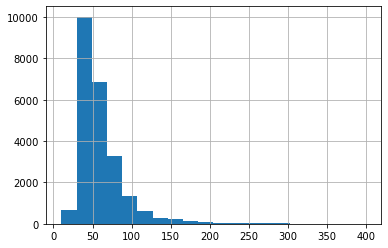

In [17]:
df['total_area'].hist(range=(10, 400), bins=20); # рассмотрим общую площадь 
df['total_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

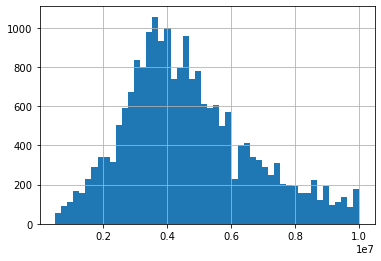

In [18]:
df['last_price'].hist(range=(500000, 10000000), bins=50); # стоимость квартир
df['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

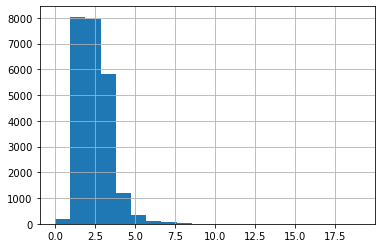

In [19]:
df['rooms'].hist(range=(0, 19), bins=20); # количество комнат 
df['rooms'].describe()                   

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

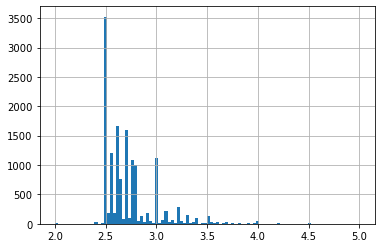

In [20]:
df['ceiling_height'].hist(range=(2, 5), bins=100); # высота потолков
df['ceiling_height'].describe()

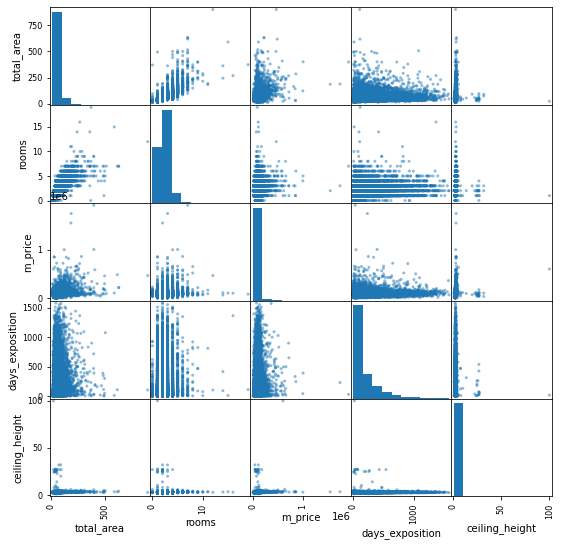

In [21]:
df_scatter_matrix = df[['total_area', 'rooms', 'm_price', 'days_exposition', 'ceiling_height']]
pd.plotting.scatter_matrix(df_scatter_matrix, figsize=(9, 9)); 
# посторим матрицу диаграмм рассеяния для 5 параметров

***Вывод по первому пункту***

Площадь большей части квартир не превышает 70 квадратных метров, зависит от количества комнат, влияет на конечную стоимость.
Стоимость квартир в большинстве случаев около 4 миллионов. Большой разброс по стоимость от 1.2 млн до 763 млн. На матрице диаграмм видна зависимость стоимости площади и количества комнат.
Количество комнат: преобладают квартиры одно и двух комнатные, но сюда же вошли студии и квартиры с открытой планирровкой. Параметр тесно связан с площадью, стоимостью и временем которое квартира находилась на продаже.
Высота потолков для большинства объектов характерна от 2,5 до 3 метров. Связь высотоы потолков с другими параметрами не заметна.


#### Шаг 4.2 Время продажи квартиры

Среднее время продажи 180 дней, но медианное значение 95, почти в 2 раза меньше. Eсть недвижимость которая очень долго продаётся и это искажает картину. 
Первый квартиль Q1 = 45 дней, поэтому можно считать, что квартиры проданные за меньший промежуток времени быстро продались.
Третий квартиль Q3 = 232 дня. Исходя из это всё, что больше уже можно назвать долгой продажей. Есть ещё максимальное значение 1580 дней, что вообще гигантская цифра на фоне среднего значения.
Стандартное отклонение на 20% выше среднего значения, что говорит о большом разбросе значений.
Минимальное время продажи 1 день - супер быстро.

In [22]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

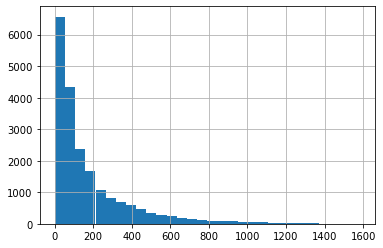

In [23]:
df['days_exposition'].hist(bins=30); # количество продаж дольше 800 дней не велико

In [24]:
mean_days_exposition = df['days_exposition'].mean()
median_days_exposition = df['days_exposition'].median()
print(f'Среднее время продажи {mean_days_exposition} дней. Медианное время продажи {median_days_exposition} дней.')

Среднее время продажи 180.88863436982163 дней. Медианное время продажи 95.0 дней.


In [25]:
days_exposition_group = df.query('days_exposition < 800') # попробуем убрать продажи больше 800 дней
days_exposition_group['days_exposition'].describe() # Медиана изменилась не сильно, а вот среднее время упало до 155.89

count    19924.000000
mean       155.848474
std        164.903461
min          1.000000
25%         44.000000
50%         91.000000
75%        212.000000
max        799.000000
Name: days_exposition, dtype: float64

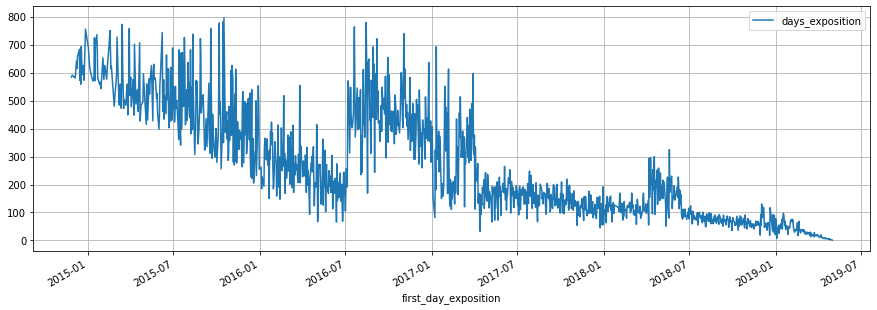

In [26]:
(days_exposition_group             # построим график зависимости времени продажи от даты 
 .pivot_table(index='first_day_exposition', values='days_exposition')
 .plot(grid=True, figsize=(15, 5)) # с июля 2016 по январь 2017 продажи сильно замедлились
);

count    648.000000
mean     404.708333
std      195.888843
min        8.000000
25%      267.750000
50%      411.000000
75%      541.250000
max      798.000000
Name: days_exposition, dtype: float64

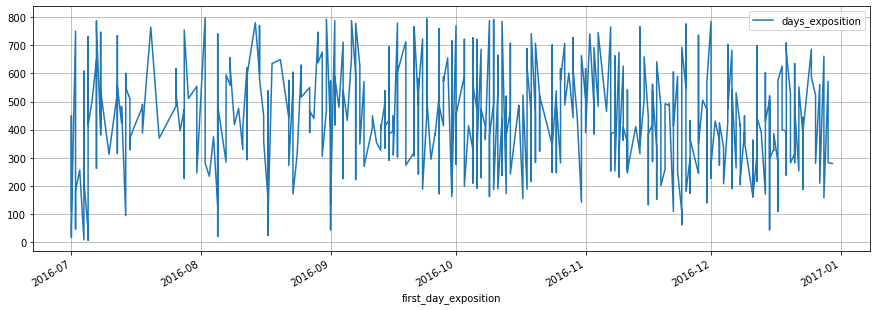

In [27]:
selection = days_exposition_group[(days_exposition_group['first_day_exposition'] >= '07.01.2016') & (days_exposition_group['first_day_exposition'] <'01.01.2017')]
selection.plot(x='first_day_exposition', y='days_exposition', grid=True, figsize=(15, 5)); 
# на графике видно, что среднеее время продажи квартиры в период с 01.07.2016 по 01.01.2017 выросло до 400 дней. 
# И в июле и августе заметно мало сделок.
selection['days_exposition'].describe()

In [28]:
days_exposition_group[(days_exposition_group['first_day_exposition'] >= '07.01.2017') & (days_exposition_group['first_day_exposition'] <'07.01.2019')]['days_exposition'].describe()

count    13819.000000
mean       104.802084
std        106.075186
min          1.000000
25%         32.000000
50%         65.000000
75%        141.000000
max        649.000000
Name: days_exposition, dtype: float64

***Вывод по данным о сроках продажи квартиры***

Рассмотрев полученные значения, можно сказать, что время продажи квартир в выделенный период сильно колебылось. В отрезок времени с 01.07.2016 по 01.01.2017 оно выросло до 406 дней, тогда как для всех значений выборки оно составляло 180 дней. А с июля 2017 года продажи ускорились до 65 по медиане и 104 дней по среднему значению.

<AxesSubplot:>

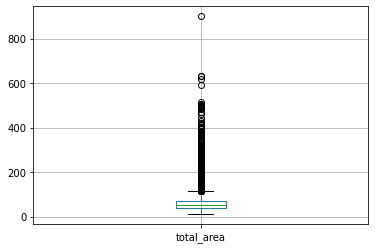

In [29]:
df.boxplot('total_area') # постоим диаграмму размаха для общей площади

In [30]:
Q1 = df['total_area'].quantile(0.25)
Q3 = df['total_area'].quantile(0.75)
IQR = Q3 - Q1 # межквартильный интервал
df = df.query('total_area < (1.5 * @IQR + @Q3)') # удалим выбросы по общей площади квартир
display(df.info(), df.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22459 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_price                22459 non-null  float64       
 1   total_area                22459 non-null  float64       
 2   first_day_exposition      22459 non-null  datetime64[ns]
 3   rooms                     22459 non-null  int64         
 4   ceiling_height            13654 non-null  float64       
 5   floors_total              22459 non-null  Int64         
 6   living_area               22459 non-null  float64       
 7   floor                     22459 non-null  int64         
 8   is_apartment              22459 non-null  bool          
 9   studio                    22459 non-null  bool          
 10  open_plan                 22459 non-null  bool          
 11  kitchen_area              22459 non-null  object        
 12  balcony           

None

,count,mean,std,min,25%,50%,75%,max
last_price,22459.0,5.307234e+06,3.395087e+06,12190.000000,3.359000e+06,4.500000e+06,6.300000e+06,8.200000e+07
total_area,22459.0,5.436491e+01,1.938533e+01,12.000000,3.940000e+01,5.010000e+01,6.560000e+01,1.146000e+02
rooms,22459.0,1.948974e+00,9.002113e-01,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
ceiling_height,13654.0,2.747722e+00,1.291950e+00,1.000000,2.500000e+00,2.640000e+00,2.770000e+00,1.000000e+02
floors_total,22459.0,1.075092e+01,6.656003e+00,0.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,22459.0,3.102447e+01,1.349027e+01,2.000000,1.800000e+01,3.000000e+01,4.000000e+01,1.450000e+02
floor,22459.0,5.917093e+00,4.911287e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
balcony,22459.0,5.956187e-01,9.511491e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
cityCenters_nearest,16985.0,1.462074e+04,8.511903e+03,208.000000,1.008500e+04,1.335400e+04,1.651800e+04,6.596800e+04
days_exposition,19594.0,1.750838e+02,2.131047e+02,1.000000,4.400000e+01,9.200000e+01,2.230000e+02,1.580000e+03


<AxesSubplot:>

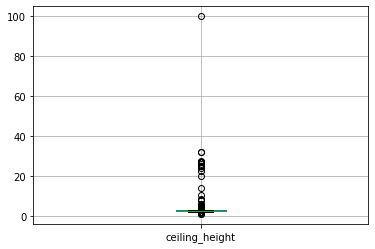

In [31]:
df.boxplot('ceiling_height') # постоим диаграмму размаха для высоты потолков

In [32]:
Q1 = df['ceiling_height'].quantile(0.25)
Q3 = df['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1 # межквартильный интервал
df = df.query('(@Q1 - 1.5 * @IQR) < ceiling_height < (1.5 * @IQR + @Q3)') # удалим выбросы по высоте потолков
display(df.info(), df.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12893 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_price                12893 non-null  float64       
 1   total_area                12893 non-null  float64       
 2   first_day_exposition      12893 non-null  datetime64[ns]
 3   rooms                     12893 non-null  int64         
 4   ceiling_height            12893 non-null  float64       
 5   floors_total              12893 non-null  Int64         
 6   living_area               12893 non-null  float64       
 7   floor                     12893 non-null  int64         
 8   is_apartment              12893 non-null  bool          
 9   studio                    12893 non-null  bool          
 10  open_plan                 12893 non-null  bool          
 11  kitchen_area              12893 non-null  object        
 12  balcony           

None

,count,mean,std,min,25%,50%,75%,max
last_price,12893.0,5.300309e+06,3.159484e+06,12190.000000,3450000.00,4.590000e+06,6.200000e+06,5.300000e+07
total_area,12893.0,5.425346e+01,1.895733e+01,12.000000,40.00,5.030000e+01,6.500000e+01,1.146000e+02
rooms,12893.0,1.971535e+00,8.917762e-01,0.000000,1.00,2.000000e+00,3.000000e+00,6.000000e+00
ceiling_height,12893.0,2.660123e+00,1.633693e-01,2.200000,2.50,2.600000e+00,2.750000e+00,3.170000e+00
floors_total,12893.0,1.054084e+01,6.261705e+00,0.000000,5.00,9.000000e+00,1.500000e+01,6.000000e+01
living_area,12893.0,3.118008e+01,1.315315e+01,2.000000,18.50,3.000000e+01,4.040000e+01,9.360000e+01
floor,12893.0,5.770263e+00,4.703293e+00,1.000000,2.00,4.000000e+00,8.000000e+00,3.000000e+01
balcony,12893.0,7.106182e-01,1.014605e+00,0.000000,0.00,0.000000e+00,1.000000e+00,5.000000e+00
cityCenters_nearest,10030.0,1.504784e+04,8.442857e+03,329.000000,10829.50,1.360600e+04,1.638575e+04,6.596800e+04
days_exposition,10839.0,1.807938e+02,2.194940e+02,1.000000,44.00,9.700000e+01,2.310000e+02,1.580000e+03


Убрали выбросы по общей площади и высоте потолков.

### Шаг 4.3 Какие факторы больше всего влияют на стоимость квартиры?

***Зависимость цены от площади квартиры***

0.6968866813304581

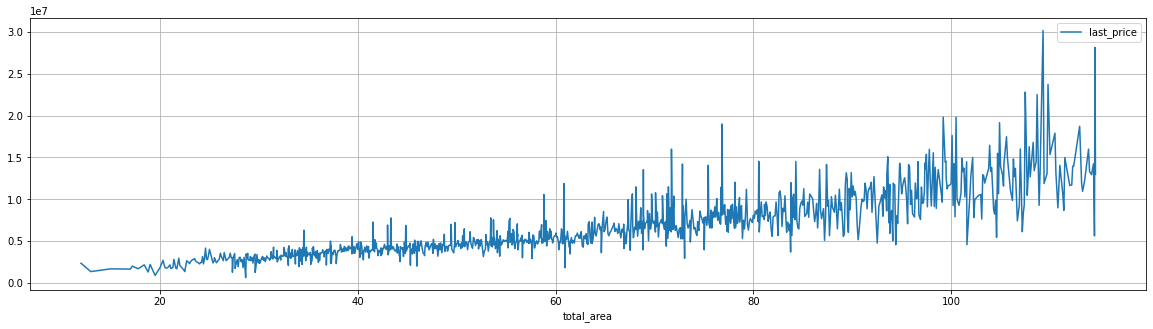

In [33]:
(df
 .pivot_table(index='total_area',values='last_price')
 .plot(grid=True, figsize=(20, 5))
); # посмотрим на зависимость цены и площади квартир
df['total_area'].corr(df['last_price']) # Корреляция в 0.7 говорит о наличии  достаточно сильной связи

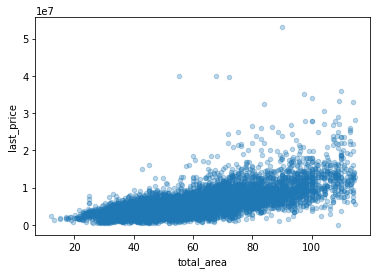

In [34]:
(df
.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
); # 

 **Вывод по зависимости цены от общей площади квартиры**

Наиболее сильная зависимость цены от площади квартиры просматривается для квартир с площадью до 100 кв.м, это видно и диаграмме рассеяния и по графику зависимости.

***Зависимость цены квартиры и числа комнат***

0.38636006611404156

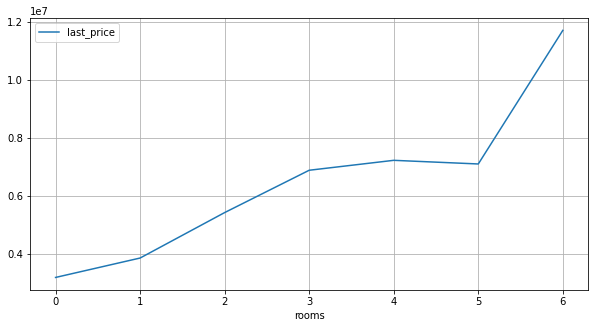

In [35]:
(df
 .pivot_table(index='rooms',values='last_price')
 .plot(grid=True, figsize=(10, 5))
) # посмотрим на зависимость цены и площади квартир
df['rooms'].corr(df['last_price']) # корреляция не большая

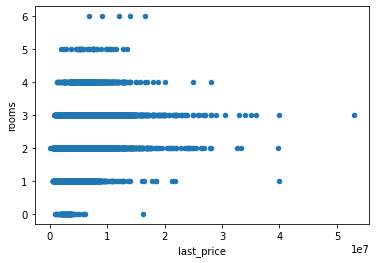

In [36]:
(df
#.query('rooms <= 3 and last_price <20000000')
.plot(x='last_price', y='rooms', kind='scatter')
); # посмотрим корреляцию на диаграмме 

***Вывод по зависимости цены от числа комнат***

Связь между двумя признаками неочевидна или слишком слаба.

***Зависимость цены квартиры от удалённости от центра***

-0.31014098965640563

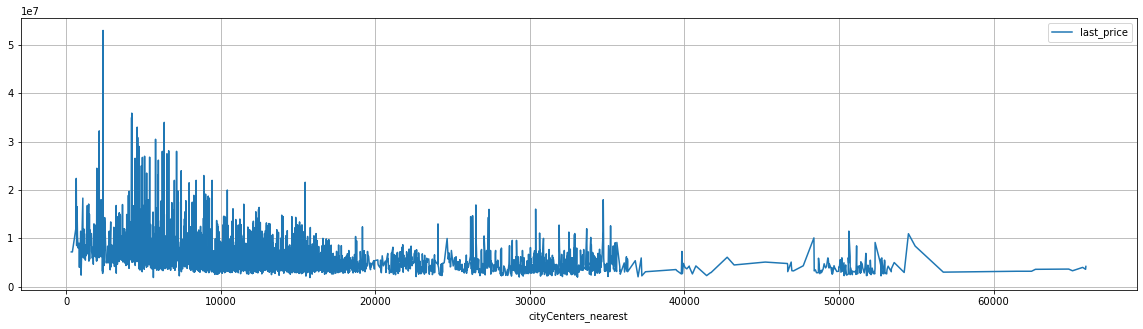

In [37]:
(df
.pivot_table(index='cityCenters_nearest',values='last_price')
.plot(grid=True, figsize=(20, 5))
);
df['cityCenters_nearest'].corr(df['last_price']) # посчитаем корреляцию

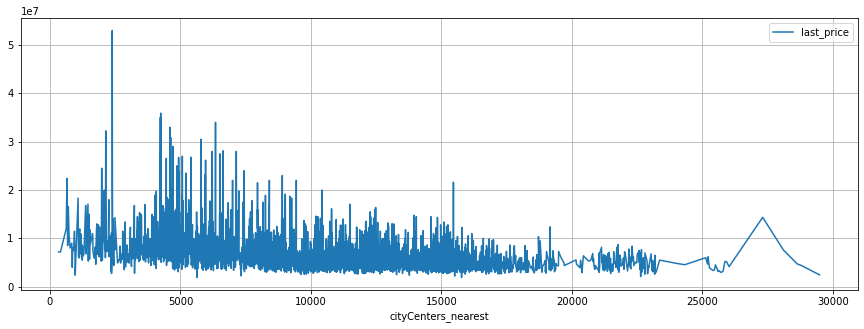

In [38]:
(df
 .query('locality_name == "Санкт-Петербург"')
 .pivot_table(index='cityCenters_nearest',values='last_price')
 .plot(grid=True, figsize=(15, 5))
); # посмотрим на зависимость цены в Санкт-Петербурге.

-0.34365482325719815

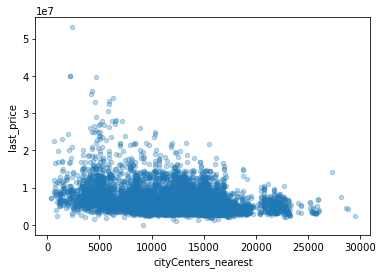

In [39]:
(df
.query('locality_name == "Санкт-Петербург"')
.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)
); 
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].corr(df['last_price'])

***Вывод по зависимости цены от удаленности от центра***

На все квартиры в срезе влияет удалённость от центра. Это подтверждает коэффициент корреляции: для всех данных она составила -0.31 как и 
для выборки по Санкт-Петербургу -0.34. 

***Зависимость цены квартиры от того, на каком этаже расположена квартира***

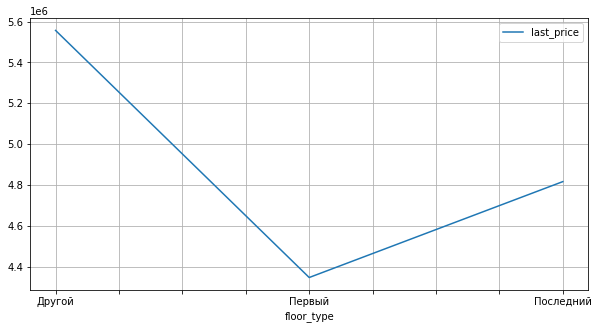

In [40]:
(df
 .pivot_table(index='floor_type',values='last_price')
 .plot(grid=True, figsize=(10, 5))
);

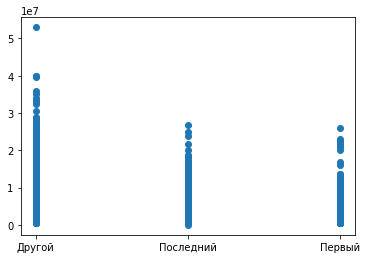

In [41]:
#df.plot(x='floor_type', y='last_price', grid=True, figsize=(10, 5), kind='scatter');
plt.scatter(df['floor_type'], df['last_price']);

Цена квартир на первом этаже ниже. Последние этажи также понижают стоимость.

**Зависимость цены квартиры от даты размещения квартиры**

Добавим столбец weekday, в который добавим номер дня недели выставления квартиры на продажу. (понедельник - 0, воскресенье - 6). 

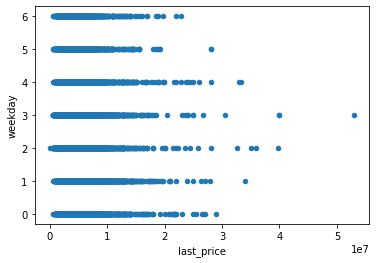

In [42]:
df['weekday'] = df['first_day_exposition'].dt.weekday  
(df
.plot(x='last_price', y='weekday', kind='scatter')
); # диаграмма не показывает связи

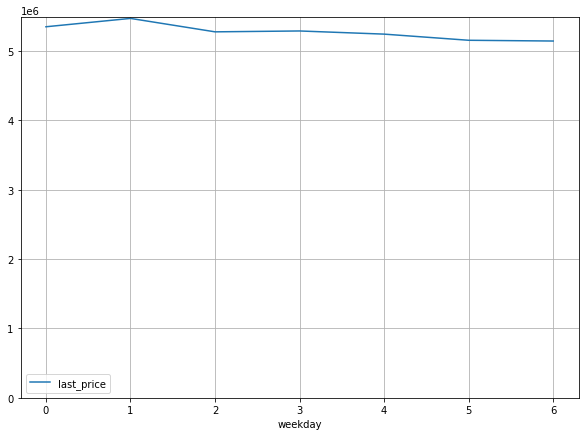

In [43]:
(df
 .pivot_table(index='weekday',values='last_price')
 .plot(grid=True, figsize=(10, 7))
 .set_ylim(ymin=0)
); # посторим график зависимости 

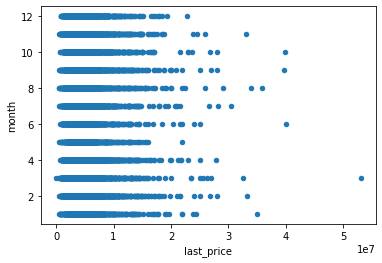

In [44]:
df['month'] = df['first_day_exposition'].dt.month
df.plot(x='last_price', y='month', kind='scatter');

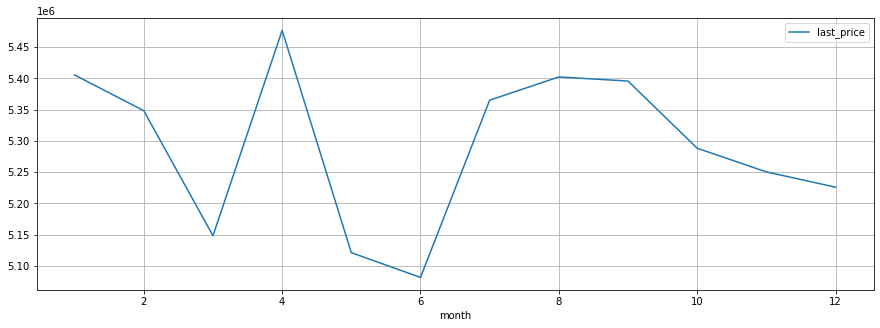

In [45]:
(df
 .pivot_table(index='month',values='last_price')
 .plot(grid=True, figsize=(15, 5),)
);# посторим график зависимости 

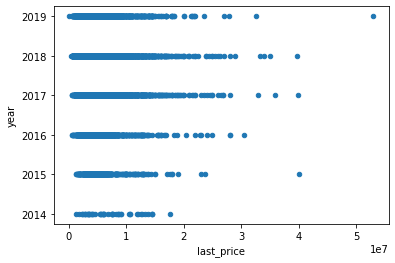

In [46]:
df['year'] = df['first_day_exposition'].dt.year.astype(int)
df.plot(x='last_price', y='year', kind='scatter');
#df.info()

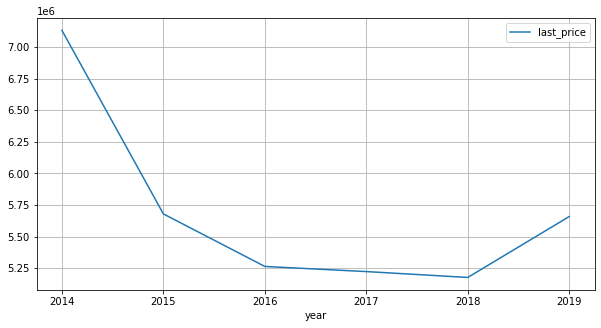

In [47]:
(df
 .pivot_table(index='year',values='last_price')
 .plot(grid=True, figsize=(10, 5))
);

***Вывод по зависимости цены от даты размещения***

На основе посторенных диаграмм и графиков можно предположить, что публиковать объявления о продаже выгоднее в апреле, августе и сентябре, а самый провальный месяц - июнь. В промежутке с 2014 по 2018 год стоимость квартир снижалась и только в 2019 наметилась тендеция к росту. День недели в котором было опубликовано объявление не влияет на продажу.

***Зависимость цены квартиры от населенного пункта***


In [48]:
df_locality_name = df.groupby('locality_name')['last_price'].count() # сгруппируем по наименованию населённого пункта
df_locality_name = df_locality_name.sort_values(ascending=False)[0:10] # оставим 10 населённых пунктов с наибольшим числом объявлений
df_locality_name

locality_name
Санкт-Петербург      8656
Всеволожск            265
посёлок Шушары        214
Пушкин                207
посёлок Мурино        198
Колпино               195
Гатчина               144
посёлок Парголово     137
Петергоф              136
деревня Кудрово       122
Name: last_price, dtype: int64

In [49]:
df_name = df.query('locality_name in @df_locality_name.index') # таблица по 10 населённым пунктам
df_name = df_name[['last_price', 'total_area', 'locality_name','m_price']] # для краткости оставим здесь 4 столбца
print('Общее количество объявлений в выбранных населенных пунктах', len(df_name))

df_name.head(10)

Общее количество объявлений в выбранных населенных пунктах 10274


,last_price,total_area,locality_name,m_price
0,13000000.0,108.0,Санкт-Петербург,120370.37
4,10000000.0,100.0,Санкт-Петербург,100000.00
9,5400000.0,61.0,Санкт-Петербург,88524.59
10,5050000.0,39.6,Санкт-Петербург,127525.25
13,3550000.0,42.8,Петергоф,82943.93
16,6700000.0,82.0,Санкт-Петербург,81707.32
18,3250000.0,31.0,Санкт-Петербург,104838.71
20,6120000.0,80.0,посёлок Парголово,76500.00
22,5000000.0,58.0,деревня Кудрово,86206.90
23,2950000.0,32.0,Санкт-Петербург,92187.50


,m_price
locality_name,
Санкт-Петербург,110123.0
Пушкин,101687.0
посёлок Парголово,90901.0
деревня Кудрово,90778.0
посёлок Мурино,87369.0
Петергоф,83910.0
посёлок Шушары,79584.0
Колпино,76174.0
Гатчина,70001.0


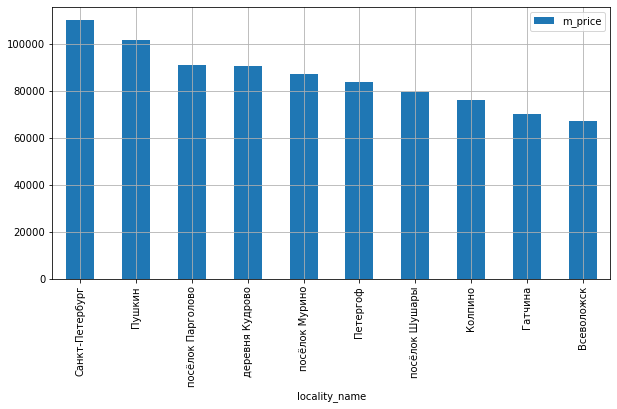

In [50]:
(df_name
 .pivot_table(index='locality_name', values='m_price', aggfunc='mean')
 .sort_values('m_price', ascending=False)
 .plot(kind='bar', grid=True, figsize=(10, 5))
);                                                   # посчитаем среднюю стоимость кв. м по населённым пунктам
display(df_name.pivot_table(index='locality_name', values='m_price', aggfunc='mean').round().sort_values('m_price', ascending=False)) 

***Вывод по зависимости цены от населенного пункта***

Из 10 населённых пунктов с наибольшим числом объявлений по цене за кв.м лидирует г.Санкт-Петербург 110123 и г.Пушкин 101687, а самая низкая цена в этой десятке г.Всеволожск 67271. 

***Зависимость цены квартиры от расстояния до центра***

In [51]:
df_cityCenters = df[['last_price', 'total_area', 'locality_name', 'cityCenters_nearest', 'm_price']].query('locality_name == "Санкт-Петербург"').dropna()
print(len(df_cityCenters)) # число объявлений по Санкт-Петербургу
df_cityCenters['km'] = (df_cityCenters['cityCenters_nearest'] / 1000).round() #  новый столбец - расстояние до центра в км
df_cityCenters

8636


,last_price,total_area,locality_name,cityCenters_nearest,m_price,km
0,13000000.0,108.00,Санкт-Петербург,16028.0,120370.37,16.0
4,10000000.0,100.00,Санкт-Петербург,8098.0,100000.00,8.0
9,5400000.0,61.00,Санкт-Петербург,15008.0,88524.59,15.0
10,5050000.0,39.60,Санкт-Петербург,13878.0,127525.25,14.0
16,6700000.0,82.00,Санкт-Петербург,10698.0,81707.32,11.0
...,...,...,...,...,...,...
23686,3300000.0,31.00,Санкт-Петербург,11602.0,106451.61,12.0
23688,9200000.0,101.00,Санкт-Петербург,14428.0,91089.11,14.0
23689,3550000.0,35.30,Санкт-Петербург,16081.0,100566.57,16.0
23691,9470000.0,72.90,Санкт-Петербург,4489.0,129903.98,4.0


In [52]:
cityCenters_mean_price = df_cityCenters.pivot_table(index='km', values='m_price', aggfunc='mean').round(2)
display(cityCenters_mean_price) # средняя стоимость квадратного метра по каждому километру удалённости от центра

,m_price
km,
0.0,95000.00
1.0,136234.05
2.0,146974.25
3.0,114716.52
4.0,130912.52
5.0,141817.96
6.0,132674.38
7.0,130758.51
8.0,124622.72


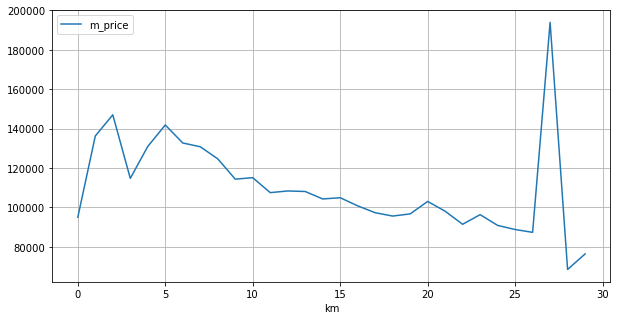

In [53]:
cityCenters_mean_price.plot(grid=True, figsize=(10, 5)); # график зависимости цены квадратного метра от расстояния до центра

***Вывод по зависимости цены от расстояния до центра Санкт-Петербурга***

На графике видно падение цены квадратного метра после 2 км от центра, значит центральной зоной можно назвать область в радиусе 2 км от центра. Пик в районе 27 км вероятно связан с нахождением там достопримечательности или просто элитного ЖК.

***Анализ квартир в центре Санкт-Петербурга***

In [54]:
# подготовим данные для анализа квартир в центре
df_center = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 2000')

In [55]:
df_center.describe().T

,count,mean,std,min,25%,50%,75%,max
last_price,82.0,9.560463e+06,4.260458e+06,2.400000e+06,6.605000e+06,8.550000e+06,1.141750e+07,2.450000e+07
total_area,82.0,7.248537e+01,2.055573e+01,1.200000e+01,5.970000e+01,7.245000e+01,8.627500e+01,1.130000e+02
rooms,82.0,2.707317e+00,9.998494e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
ceiling_height,82.0,2.881585e+00,1.930168e-01,2.500000e+00,2.735000e+00,2.900000e+00,3.007500e+00,3.170000e+00
floors_total,82.0,4.573171e+00,9.690327e-01,3.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,7.000000e+00
living_area,82.0,4.474268e+01,1.583710e+01,1.000000e+01,3.362500e+01,4.335000e+01,5.475000e+01,8.450000e+01
floor,82.0,3.036585e+00,1.435400e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
balcony,82.0,1.463415e-01,5.470900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
cityCenters_nearest,82.0,1.320476e+03,3.993152e+02,3.290000e+02,1.096750e+03,1.299500e+03,1.644000e+03,1.980000e+03
days_exposition,71.0,2.661831e+02,2.949353e+02,3.000000e+00,7.050000e+01,1.430000e+02,3.785000e+02,1.477000e+03


count     82.000000
mean      72.485366
std       20.555730
min       12.000000
25%       59.700000
50%       72.450000
75%       86.275000
max      113.000000
Name: total_area, dtype: float64

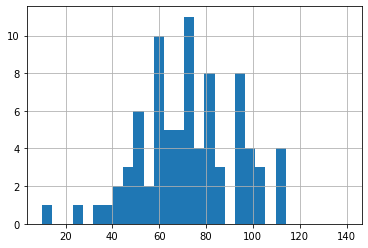

In [56]:
df_center['total_area'].hist(range=(10, 140), bins=30); # площадь квартр
df_center['total_area'].describe()

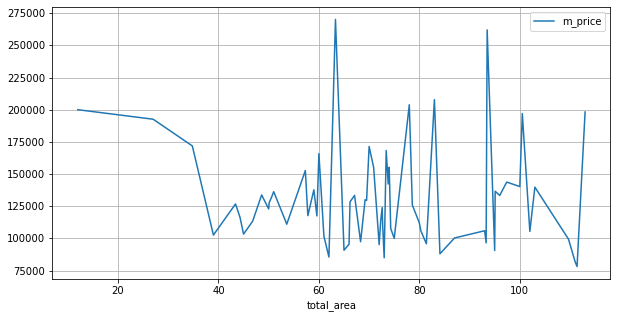

In [57]:
# зависимость цены квадратного метра и величины общей площади
df_center.pivot_table(index='total_area', values='m_price').plot(grid=True, figsize=(10, 5));

Сравнивая полученные значения с первоначальным исследованием среза по площади видим, что средняя площадь квартир в центре больше почти на 25% , больше и медианное значение. 

count    8.200000e+01
mean     9.560463e+06
std      4.260458e+06
min      2.400000e+06
25%      6.605000e+06
50%      8.550000e+06
75%      1.141750e+07
max      2.450000e+07
Name: last_price, dtype: float64

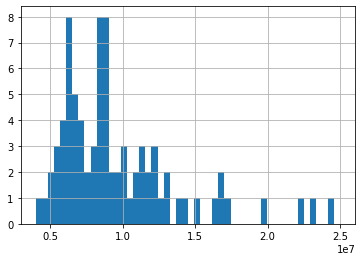

In [58]:
df_center['last_price'].hist(range=(4000000, 25000000), bins=50); # стоимость квартир
df_center['last_price'].describe()

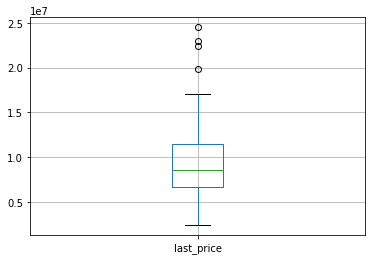

In [59]:
df_center.boxplot('last_price'); # постоим диаграмму размаха

Минимальная стоимость квартиры в центре больше чем в 2 раза выше, чем по основному срезу. Межквартильный размах для квартир в центре от 6.6 до 11 млн, а для выборки 3.45 до 6.2 млн. да и стандартное отклонение выше. Эти цифры и графики говорят о том, что цены на квартиры в центре больше.

count    82.000000
mean      2.707317
std       0.999849
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       6.000000
Name: rooms, dtype: float64

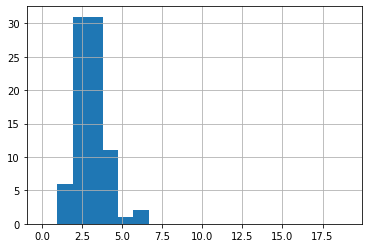

In [60]:
df_center['rooms'].hist(range=(0, 19), bins=20); # количество комнат 
df_center['rooms'].describe() 

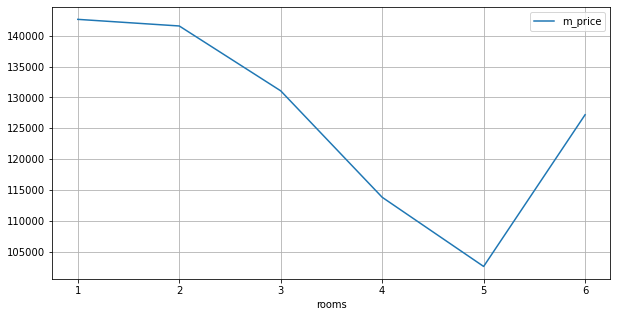

In [61]:
# зависимость цены квадратного метра и количество комнат
df_center.pivot_table(index='rooms', values='m_price').plot(grid=True, figsize=(10, 5));

По количеству комнат в центре преобладают двух и трёхкомнатные квартиры. Медианное значение для среза по центру 3 комнаты, как и для основной выборки.  

count    82.000000
mean      2.881585
std       0.193017
min       2.500000
25%       2.735000
50%       2.900000
75%       3.007500
max       3.170000
Name: ceiling_height, dtype: float64

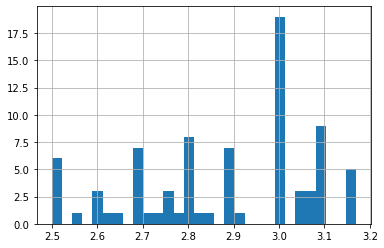

In [62]:
df_center['ceiling_height'].hist(bins=30); # высота потолков
df_center['ceiling_height'].describe()

Высота потолков в квартирах центра и других районах не сильно отличается, но в квартирах в центре чаще встречается высота 3 метра. 

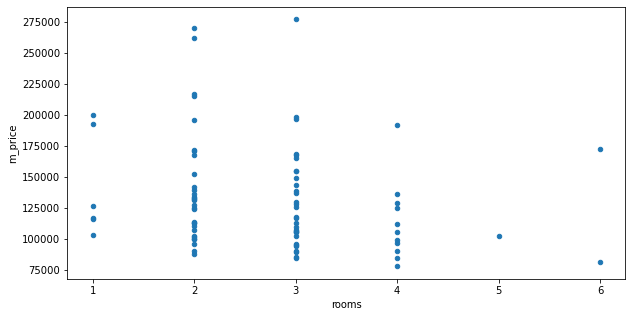

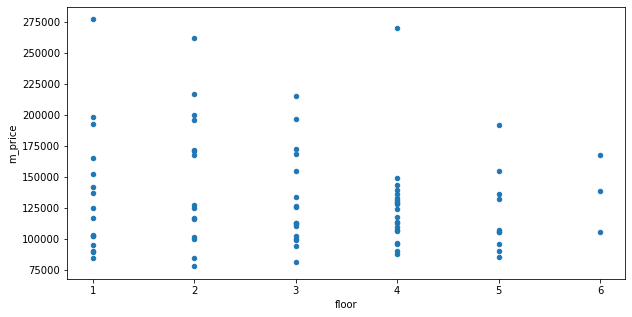

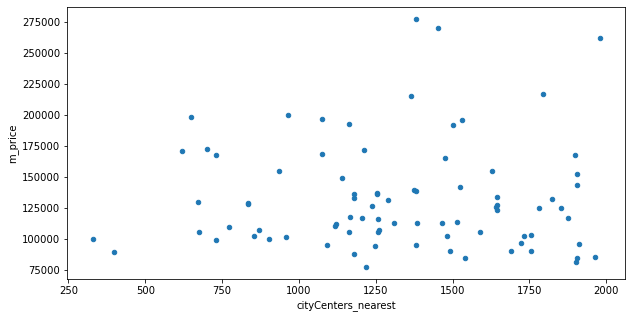

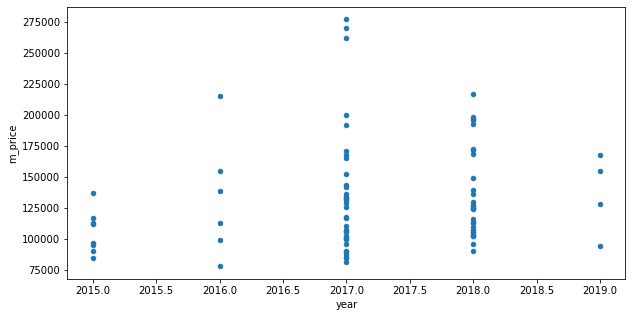

In [63]:
parameter = ['rooms', 'floor', 'cityCenters_nearest', 'year']
for value in parameter:
    df_center.plot(x=value, y='m_price', kind='scatter', figsize=(10, 5));

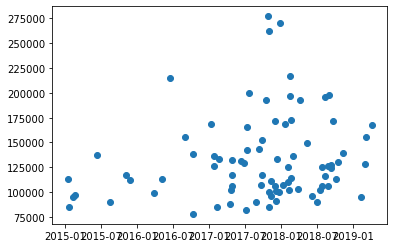

In [64]:
plt.plot_date(df_center['first_day_exposition'], df_center['m_price']);

In [65]:
df_center[['m_price', 'last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()# для признаков стоимость,  площадь и количество километров до центра посчитаем корреляцию

,m_price,last_price,total_area,rooms,cityCenters_nearest
m_price,1.000000,0.702530,-0.102280,-0.196395,0.013084
last_price,0.702530,1.000000,0.603867,0.280581,0.014056
total_area,-0.102280,0.603867,1.000000,0.678564,0.009413
rooms,-0.196395,0.280581,0.678564,1.000000,-0.036970
cityCenters_nearest,0.013084,0.014056,0.009413,-0.036970,1.000000


***Вывод по анализу квартир в центре Санкт_петербурга***

Квартиры в центре города стоят дороже, чем в целом по городу. Для них характрена большая общая площадь, а высота потолков и количество комнат сходные по значению.
Цена квадратного метра в центре не зависит от площади квартиры, а вот по городу зависимость сильная.
Для двухкомнатных квартир характерна высокая стоимость квадратного метра, но возможно, что это связано с маленьким количеством однокомнатных квартир, которые попали в срез.
Высота потолков сама по себе заметного влияния на стоимость не имеет.
Число комнат и стоимость квадратного метра имеет обратную зависимость(чем больше комнат и общая площадь, тем меньше стоимость квадратного метра).
Последний этаж понижат стоимоть, это характерно для всего города, в остальном второй и третий этажи показывают большую стоимость. А вот по первому 
тажу всё не так однозначно - если в целом по городу он понижает стоимость кв.м, то в центре такой тенденции не наблюдается.
Близость к центру города повышает стоимость квадратного метра.
На квартиры в центре дата продажи не сильно влияет цены там стабильны, в отличае от остальных районов.

### Вывод

При расчёте стоимости квартиры необходимо учитывать:
- название населённого пункта, где раположена квартира
- для квартир Санкт-Петербурга учитывать расстояние до центра
- этаж (первый, последний)
- число комнат
- площадь
Так же косвенное влияние на стоимость имеет высота потолков, месяц публикации объявления, наличие балкона, планировка. 

В ходе проведения анализа было выявлено большое количество пропусков в данных, часть их них заполнили 

- is_apartment заменили пропуски в соответствии с предположением, что это не апартаменты
- balcony - отсутствие значения заменили на 0
- kitchen_area - для квартир типа студия и открытая планировка пропуски заменили на 5, остальное заменили на 0
- living_area - пропуски заменили разницей общей площади и площади кухни, для строк с заполненными значениями, остальное заменили на 0
- days_exposition - не заполняли пропуски, предположив, что это не проданные квартиры

Так же в первоначальном DataFrame параметры общая площадь и высота потолков имели очень большой разброс. Удалили все выбросы - получился срез 12893 строки(это около 58%), с которым и работали в дальнейшем.